# Fase 3: Regressão Polinomial - Overfitting

Nesta fase iremos considerar a **Regressão Polinomial** com uma variável x.  
A Regressão Polinomial encaixa uma relação não linear entre o valor de x e o valor correspondente de y.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### a) Importação dos Dados

Baixe o arquivo `data_preg.mat` ou `data_preg.csv`.  
A primeira coluna representa os valores de x e a segunda coluna representa os valores de y.

In [2]:
file_path = "data_preg.csv"
df = pd.read_csv(file_path, header=None)
df.columns = ["X", "Y"]
X = df["X"].values.reshape(-1, 1)
Y = df["Y"].values.reshape(-1, 1)

### b) Gráfico de Dispersão dos Dados

Faça o gráfico de dispersão dos dados.

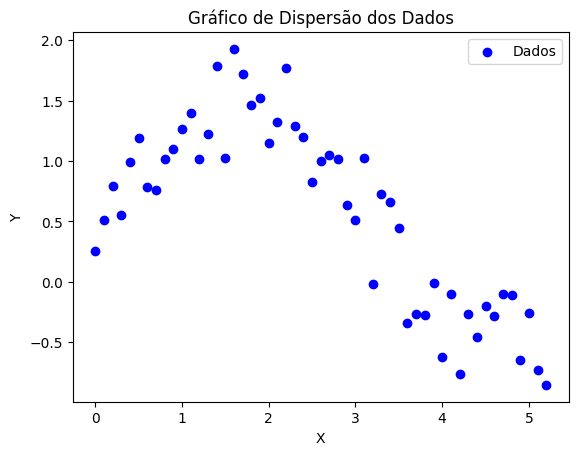

In [3]:
def plot_grafico_dispersao_vazio(x, y):
    plt.scatter(x, y, color="blue", label="Dados")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gráfico de Dispersão dos Dados")
    plt.legend()
    plt.show()
plot_grafico_dispersao_vazio(X, Y)

### c) Regressão Polinomial de Grau 1

Use a função `polyfit` para gerar a linha de regressão para N = 1 e trace-a no gráfico de dispersão na cor vermelha (`plot(x, y, 'r')`).  
**Observação:** Nesta função a numeração dos coeficientes é invertida!  
- β₀ = βN  
- β₁ = βN−1  
- β₂ = βN−2  
- ...  
- βN = β₀

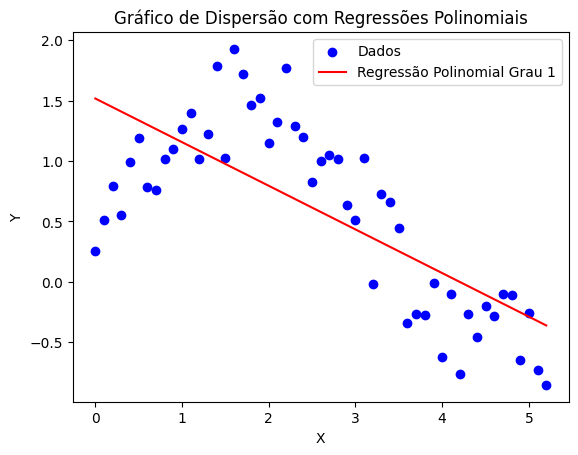

In [4]:
def getBeta(x, y, N=1):
    beta = np.polyfit(x.flatten(), y.flatten(), N)
    return beta

def regressao_polinomial(x, beta):
    # Fórmula: y = 𝛽0 + 𝛽1X + 𝛽2X2 + 𝛽3X3 + …+ 𝛽 NXN
    y_pred = np.zeros_like(x, dtype=float)
    for i in range(len(beta)):
        y_pred += beta[i] * x ** (len(beta) - 1 - i)
    return y_pred

def plot_grafico_dispersao(x, y, regressao = [], regressao_dict={}):
    plt.scatter(x, y, color="blue", label="Dados")
    if regressao_dict != {}:
        for grau, (r, cor) in regressao_dict.items():
            plt.plot(x, r, color=cor, label=f"Regressão Polinomial Grau {grau}")
    else:
        plt.plot(x, regressao, color="red", label=f"Regressão Polinomial Grau {1}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gráfico de Dispersão com Regressões Polinomiais")
    plt.legend()
    plt.show()

beta = getBeta(X, Y, 1)

regressao = regressao_polinomial(X, beta)

plot_grafico_dispersao(X, Y, regressao, {})

### d) Regressão Polinomial de Grau 2

Trace a linha de regressão para N = 2 no gráfico na cor verde.  
Para isso, você deverá calcular esta função:  
*y = β₀ + β₁X + β₂X² + β₃X³ + …+ βN Xⁿ*  
Ou seja, **não pode usar a função pronta do Python**.

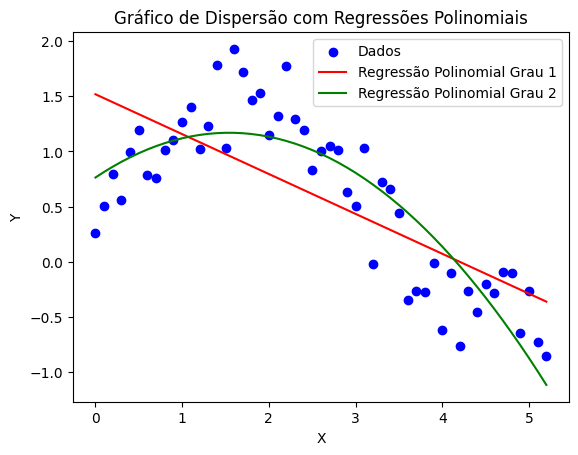

In [5]:
regressoes = {
    1: (regressao_polinomial(X, getBeta(X, Y, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X, Y, 2)), "green")
}

plot_grafico_dispersao(X, Y, [], regressoes)

### e) Regressão Polinomial de Grau 3

Trace a linha de regressão para N = 3 no gráfico na cor preta.

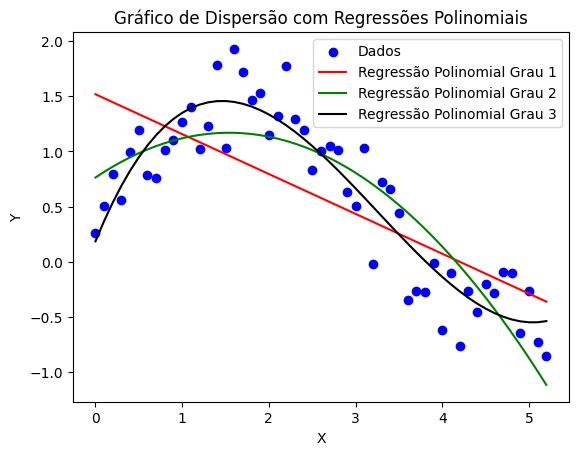

In [6]:
regressoes = {
    1: (regressao_polinomial(X, getBeta(X, Y, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X, Y, 2)), "green"),
    3: (regressao_polinomial(X, getBeta(X, Y, 3)), "black")
}

plot_grafico_dispersao(X, Y, [], regressoes)

### f) Regressão Polinomial de Grau 8

Trace a linha de regressão para N = 8 no gráfico na cor amarela.

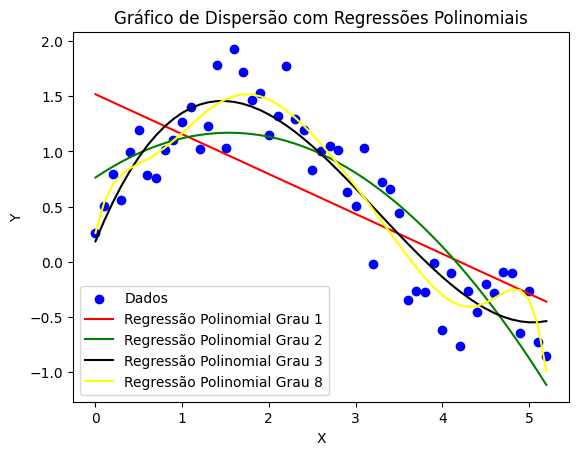

In [7]:
regressoes = {
    1: (regressao_polinomial(X, getBeta(X, Y, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X, Y, 2)), "green"),
    3: (regressao_polinomial(X, getBeta(X, Y, 3)), "black"),
    8: (regressao_polinomial(X, getBeta(X, Y, 8)), "yellow")
}

plot_grafico_dispersao(X, Y, [], regressoes)

### g) Erro Quadrático Médio (EQM)

Calcule o Erro Quadrático Médio (EQM) para cada linha de regressão.  
Qual é o mais preciso?

In [8]:

def calcular_eqm(y_true, y_pred):
    mse = 0
    n = len(y_true)
    for i in range(n):
        # Fórmula: (yi​−y^​i​)2
        erro = y_true.flatten()[i] - y_pred.flatten()[i]
        mse += erro**2
    return mse / n

eqms = {}
melhor_grau = None
menor_eqm = float('inf')
for grau, (y_pred, cor) in regressoes.items():
    eqm = calcular_eqm(Y, y_pred)
    eqms[grau] = eqm
    print(f"Grau {grau} ({cor}): EQM = {eqm:.6f}")
    
    if eqm < menor_eqm:
        menor_eqm = eqm
        melhor_grau = grau

# O menor EQM indica a regressão mais precisa
print(f"\nA regressão mais precisa é a de grau {melhor_grau} ({regressoes[melhor_grau][1]}) com EQM = {eqms[melhor_grau]:.6f}")

Grau 1 (red): EQM = 0.265934
Grau 2 (green): EQM = 0.138526
Grau 3 (black): EQM = 0.078697
Grau 8 (yellow): EQM = 0.058709

A regressão mais precisa é a de grau 8 (yellow) com EQM = 0.058709


### h) Divisão dos Dados em Treinamento e Teste

Para evitar o overfitting, divida os dados aleatoriamente em Dados de Treinamento e Dados de Teste.  
Use 10% dos dados como conjunto de teste, e o resto como de treinamento.

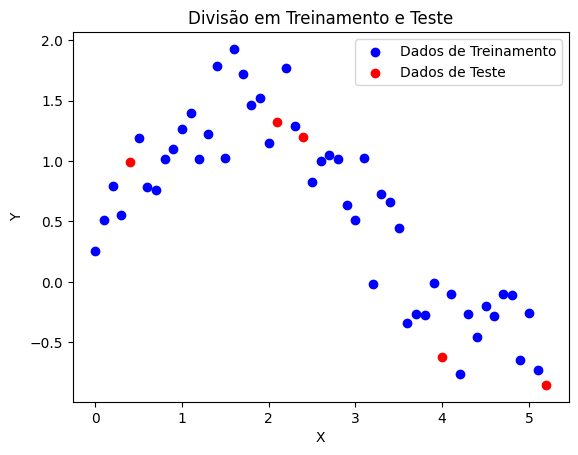

In [9]:
def dividir_treino_teste(X, Y, teste_perc):
    n = len(Y)
    n_teste = int(n * teste_perc)
    
    indices = np.arange(n)
    np.random.shuffle(indices)

    indices_teste = indices[:n_teste]
    indices_treino = indices[n_teste:]
    
    X_treino = X[indices_treino]
    Y_treino = Y[indices_treino]
    X_teste = X[indices_teste]
    Y_teste = Y[indices_teste]
    
    return X_treino, Y_treino, X_teste, Y_teste

X_treino, Y_treino, X_teste, Y_teste = dividir_treino_teste(X, Y, 0.1)

def plot_grafico_treino_teste(X_treino, Y_treino, X_teste , Y_teste):
    plt.scatter(X_treino, Y_treino, color='blue', label='Dados de Treinamento')
    plt.scatter(X_teste, Y_teste, color='red', label='Dados de Teste')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Divisão em Treinamento e Teste')
    plt.legend()
    plt.show()

plot_grafico_treino_teste(X_treino,Y_treino,X_teste,Y_teste)

### i) Ajuste das Regressões Usando Apenas os Dados de Treinamento

Repita os passos de c - f, mas agora use apenas os dados de treinamento para ajustar a linha de regressão.

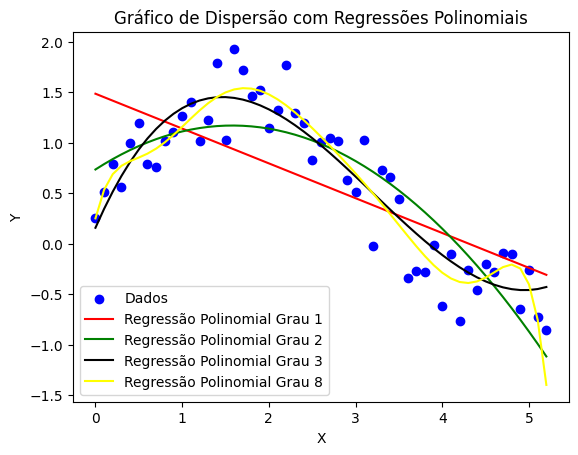

In [10]:
regressoes_treino = {
    1: (regressao_polinomial(X, getBeta(X_treino, Y_treino, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X_treino, Y_treino, 2)), "green"),
    3: (regressao_polinomial(X, getBeta(X_treino, Y_treino, 3)), "black"),
    8: (regressao_polinomial(X, getBeta(X_treino, Y_treino, 8)), "yellow"),
}

plot_grafico_dispersao(X, Y, [], regressoes_treino)

### j) Cálculo do Erro nos Dados de Teste

Repita o passo g, mas agora utilize somente os dados de teste para calcular o erro.

In [11]:
eqms_teste = {}
eqms_treino = {}
melhor_grau_teste = None
melhor_grau_treino = None
menor_eqm_teste = float('inf')
menor_eqm_treino = float('inf')

for grau, (y_pred_full, cor) in regressoes_treino.items():
    # Recalcula a predição
    beta = getBeta(X_treino, Y_treino, grau)
    y_pred_teste = regressao_polinomial(X_teste, beta)
    eqm_teste = calcular_eqm(Y_teste, y_pred_teste)
    eqms_teste[grau] = eqm_teste
    print(f"Grau {grau} ({cor}): EQM no teste = {eqm_teste:.6f}")
    if eqm_teste < menor_eqm_teste:
        menor_eqm_teste = eqm_teste
        melhor_grau_teste = grau

print(f"\nA regressão mais precisa nos dados de teste é a de grau {melhor_grau_teste} ({regressoes_treino[melhor_grau_teste][1]}) com EQM) = {eqms_teste[melhor_grau_teste]:.6f}")
print("\n- - - - - - - - - -\n")        
for grau, (y_pred_full, cor) in regressoes_treino.items():
    # Recalcula a predição
    beta = getBeta(X_treino, Y_treino, grau)
    y_pred_treino = regressao_polinomial(X_treino, beta)
    eqm_treino = calcular_eqm(Y_treino, y_pred_treino)
    eqms_treino[grau] = eqm_treino
    print(f"Grau {grau} ({cor}): EQM no treino = {eqm_treino:.6f}")
    if eqm_treino < menor_eqm_treino:
        menor_eqm_treino = eqm_treino
        melhor_grau_treino = grau

print(f"\nA regressão mais precisa nos dados de treino é a de grau {melhor_grau_treino} ({regressoes_treino[melhor_grau_treino][1]}) com EQM) = {eqms_treino[melhor_grau_treino]:.6f}")

Grau 1 (red): EQM no teste = 0.311172
Grau 2 (green): EQM no teste = 0.144920
Grau 3 (black): EQM no teste = 0.096165
Grau 8 (yellow): EQM no teste = 0.090115

A regressão mais precisa nos dados de teste é a de grau 8 (yellow) com EQM) = 0.090115

- - - - - - - - - -

Grau 1 (red): EQM no treino = 0.262031
Grau 2 (green): EQM no treino = 0.138006
Grau 3 (black): EQM no treino = 0.078176
Grau 8 (yellow): EQM no treino = 0.060294

A regressão mais precisa nos dados de treino é a de grau 8 (yellow) com EQM) = 0.060294


### k) Coeficiente de Determinação (R²)

Veja o que calcula o Coeficiente de Determinação ou R quadrado.  
Calcule o R² para os dados de treino e teste (veja a função `r2_score` da biblioteca `sklearn.metrics`).  
O que se pode concluir com os resultados?

In [12]:
print("R² para os dados de treino e teste:")
for grau in regressoes_treino.keys():
    
    beta = getBeta(X_treino, Y_treino, grau)
    y_pred_treino = regressao_polinomial(X_treino, beta)
    r2_treino = r2_score(Y_treino, y_pred_treino)
    
    y_pred_teste = regressao_polinomial(X_teste, beta)
    r2_teste = r2_score(Y_teste, y_pred_teste)
    print(f"Grau {grau}: R² treino = {r2_treino:.4f} | R² teste = {r2_teste:.4f}")

print("Se o R² do treino é muito maior que o do teste, irá ter overfitting.")
print("Se ambos são baixos, irá ter underfitting.")
print("O melhor polinômio é o que mantém o R² alto e EQM baixo nos dois conjuntos.\n")

R² para os dados de treino e teste:
Grau 1: R² treino = 0.5100 | R² teste = 0.6501
Grau 2: R² treino = 0.7419 | R² teste = 0.8370
Grau 3: R² treino = 0.8538 | R² teste = 0.8919
Grau 8: R² treino = 0.8873 | R² teste = 0.8987
Se o R² do treino é muito maior que o do teste, irá ter overfitting.
Se ambos são baixos, irá ter underfitting.
O melhor polinômio é o que mantém o R² alto e EQM baixo nos dois conjuntos.



### l) Modelo Mais Preciso

Visto o cálculo do erro e do coeficiente de determinação, qual o modelo mais preciso neste caso?  
Explique sua resposta.

In [13]:
print("O modelo mais preciso é aquele que apresenta baixo EQM (Erro Quadrático Médio) e alto R² (coeficiente de determinação) nos dados de teste.\nPois ele consegue generalizar melhor para novos dados, apresentando bom desempenho tanto no treino quanto no teste, sem overfitting ou underfitting.")
print("Tendo em vista isso, o melhor grau verificado foi o grau 8, que apresentou o melhor resultados.\nPorém pode variar conforme a divisão dos dados em treino e teste.")

O modelo mais preciso é aquele que apresenta baixo EQM (Erro Quadrático Médio) e alto R² (coeficiente de determinação) nos dados de teste.
Pois ele consegue generalizar melhor para novos dados, apresentando bom desempenho tanto no treino quanto no teste, sem overfitting ou underfitting.
Tendo em vista isso, o melhor grau verificado foi o grau 8, que apresentou o melhor resultados.
Porém pode variar conforme a divisão dos dados em treino e teste.
